In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from gaze_utility import calculate_dist_and_veloc
from fixation import generate_IVT_fixation
from preprocessing import remove_outlier_by_z

data_path = 'data/'

# get participant names
names = set()
for _,_, fns in os.walk(data_path):
    for fn in fns:
        # print(fn.split('_')[0])
        names.add(fn.split('_')[0])
names = list(names)
print('participants names: ', names)
print('participant num: ', len(names))

participants names:  ['jt', 'lf', 'yz', 'ts', 'yq', 'mr', 'mh', 'hw', 'lr', 'yx']
participant num:  10


<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

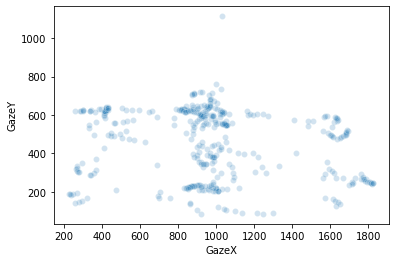

In [2]:
# take grid1 of for example
name = 'mr'
gaze_data = pd.read_json(data_path + name + '_gaze.txt', lines=True)
data = gaze_data.loc[gaze_data['record_event'] == 'gaze_grid_1']
sns.scatterplot(x='GazeX', y='GazeY', data=data, alpha=0.2)

<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

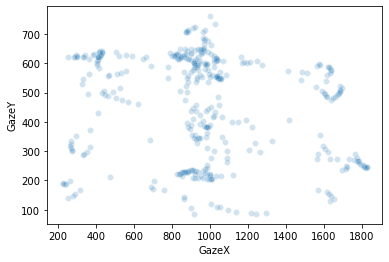

In [3]:
# remove outlier
data = remove_outlier_by_z(data, 'GazeX')
data = remove_outlier_by_z(data, 'GazeY')
sns.scatterplot(x='GazeX', y='GazeY', data=data, alpha=0.2)

In [4]:
# calculate dist, velocity, time passed
d, v, t = calculate_dist_and_veloc(data)
data['distance'], data['velocity'], data['time_pass'] = v, d, t
data.head(20)

,GazeX,GazeY,HeadX,HeadY,HeadZ,HeadYaw,HeadPitch,HeadRoll,rx,ry,...,time,FrameNr,Xview,Yview,docX,docY,record_event,distance,velocity,time_pass
0,917.6,86.6,1.1,0.5,39.1,-3.0,2.8,6.3,195,177,...,1597666384894,2461,0.477917,0.072167,917.6,86.6,gaze_grid_1,0.407383,27.294688,67
1,898.2,105.8,1.1,0.5,39.0,-3.0,2.8,6.2,195,177,...,1597666384961,2463,0.467812,0.088167,898.2,105.8,gaze_grid_1,1.362720,44.969768,33
2,864.0,135.0,1.2,0.5,38.8,-3.0,2.9,6.2,195,177,...,1597666384994,2464,0.450000,0.112500,864.0,135.0,gaze_grid_1,0.066221,9.602083,145
3,864.2,144.6,1.2,0.5,38.8,-3.0,3.1,6.2,195,177,...,1597666385139,2465,0.450104,0.120500,864.2,144.6,gaze_grid_1,4.039745,222.185958,55
4,1023.0,300.0,1.2,0.5,38.8,-2.9,3.0,6.2,195,177,...,1597666385194,2467,0.532813,0.250000,1023.0,300.0,gaze_grid_1,4.099374,270.558681,66
5,1052.0,569.0,1.3,0.7,39.0,-2.9,1.9,6.2,195,177,...,1597666385260,2469,0.547917,0.474167,1052.0,569.0,gaze_grid_1,1.669522,111.857946,67
6,1048.4,457.2,1.2,0.7,39.3,-3.3,2.2,6.4,195,177,...,1597666385327,2471,0.546042,0.381000,1048.4,457.2,gaze_grid_1,1.659726,111.201619,67
7,1066.0,347.4,1.2,0.7,39.2,-3.0,2.2,6.3,198,181,...,1597666385394,2473,0.555208,0.289500,1066.0,347.4,gaze_grid_1,0.708158,23.369211,33
8,1081.6,330.0,1.2,0.7,39.3,-3.0,2.5,6.3,198,182,...,1597666385427,2474,0.563333,0.275000,1081.6,330.0,gaze_grid_1,0.467738,30.870698,66
9,1088.0,299.8,1.2,0.7,39.3,-3.0,2.8,6.3,198,182,...,1597666385493,2476,0.566667,0.249833,1088.0,299.8,gaze_grid_1,0.676368,22.996521,34


<AxesSubplot:>

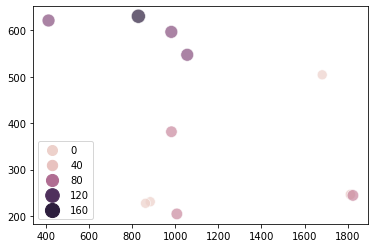

In [26]:
fixations = generate_IVT_fixation(data, 3)
fixations_points = np.array([f['centroid'] for f in fixations])
durations = [f['duration'] for f in fixations]
sns.scatterplot(x=fixations_points[:, 0], y=fixations_points[:, 1],
                size=durations, sizes=(100,200),
                hue=durations, alpha=0.7)